In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

## Exercise 1

In [2]:
X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25], dtype=np.float32)
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)

theta = np.array([0, 0], dtype=np.float32)

In [3]:
max_iter = 10000
eps = 0.00001
prev_cost = 99

In [4]:
for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta[0] - theta[1]*X))
    
    #finding best parameters theta comes down to minimazing crossentropy func
    crossentropy = -y*np.log(h_x + 0.00001) - (1-y)*np.log(1-h_x + 0.00001)
    cost = sum(crossentropy) / len(y)

    # Compute theta_deriv the same as in linear regression
    theta0_deriv = sum(h_x-y)/len(y)
    theta1_deriv = sum((h_x-y) * X) / len(y)

    alpha = 0.1

    theta[0] = theta[0] - alpha*theta0_deriv
    theta[1] = theta[1] - alpha*theta1_deriv
    
    # print every 200 iter:
    if i%200 == 0:
        print("iter ", str(i+1), ", cost ", cost)
        

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost = cost

iter  1 , cost  0.6931271553039551
iter  201 , cost  0.30629978341113945
iter  401 , cost  0.23421741421324524
iter  601 , cost  0.19879218728833206
iter  801 , cost  0.17673719979583521
iter  1001 , cost  0.16127501798721575
iter  1201 , cost  0.14963012529510292
iter  1401 , cost  0.1404300792034767
iter  1601 , cost  0.13290822395744975
iter  1801 , cost  0.12659843264447607
iter  2001 , cost  0.12119857560661661
iter  2201 , cost  0.11650309125649404
iter  2401 , cost  0.11236642009635034
iter  2601 , cost  0.10868225700625606
iter  2801 , cost  0.10537082050461777
iter  3001 , cost  0.10237090754716602
iter  3201 , cost  0.09963465652708692
iter  3401 , cost  0.09712398496301168
iter  3601 , cost  0.09480826353658565
iter  3801 , cost  0.09266236309304077


In [5]:
dec_bound = -theta[0]/theta[1]

### Ex 1 Results

In [6]:
print("After optimization:")
print("theta : ", theta)
print("cost : ", cost)
print("decision bundary: ", dec_bound)

After optimization:
theta :  [-9.830578   1.5369736]
cost :  0.09176648165521328
decision bundary:  6.3960614


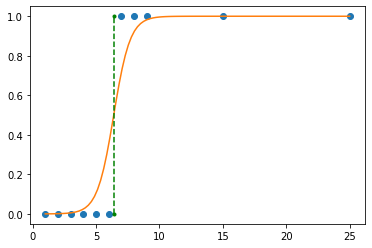

In [7]:
x_samples = np.linspace(min(X), max(X), 100)
y_samples = 1 / (1 + np.exp(-theta[0] - theta[1]*x_samples))

plt.plot(X, y, 'o')
plt.plot(x_samples, y_samples, '-')

X_dec_b = [dec_bound, dec_bound]
Y_dec_b = [0.0, 1.0]
plt.plot(X_dec_b, Y_dec_b, 'g.--')

plt.show()

## Exercise 2

In [8]:
X = np.array([[ 1, 2, 3, 4, 5, 6, 7, 8, 9, 15, 25],
              [13, 9, 8, 6, 4, 2, 1, 0, 3,  4,  2]], dtype=np.float32)

y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1,  1,  1], dtype=np.float32)
y.shape = [1, len(y)]
theta = np.zeros((X.shape[0] +1, 1))

In [9]:
# Add ones vector to X
X_ones = np.ones(X.shape[1])
X_ones.shape = [1, len(X_ones)]

In [10]:
X = np.concatenate((X_ones, X),axis=0)

In [11]:
X

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 15., 25.],
       [13.,  9.,  8.,  6.,  4.,  2.,  1.,  0.,  3.,  4.,  2.]])

In [12]:
max_iter = 10000
eps = 0.00001
alpha = 0.05
prev_cost = 99

In [13]:
for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta.T@X))

    crossentropy = -y*np.log(h_x+0.00001) - (1-y)*np.log(1-h_x+0.00001)
    [cost] = np.sum(crossentropy, axis=1) / X.shape[1]

    theta_derivs = sum((h_x-y) @ X.T) / X.shape[1]
    theta_derivs.shape = [len(theta_derivs), 1]

    theta = theta - alpha*theta_derivs

    # print every 200 iter:
    if i%200 == 0:
        print("iter ", str(i+1), ", cost ", cost)

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost = cost

iter  1 , cost  0.6931271807599427
iter  201 , cost  0.14527660309092222
iter  401 , cost  0.13134430979935588
iter  601 , cost  0.12376918937117352
iter  801 , cost  0.1183248116132314
iter  1001 , cost  0.11393628186814432
iter  1201 , cost  0.11018248958757319
iter  1401 , cost  0.10685731636114468
iter  1601 , cost  0.10384488361151334
iter  1801 , cost  0.10107357396371434
iter  2001 , cost  0.09849597222241017
iter  2201 , cost  0.09607899963122346
iter  2401 , cost  0.09379860534350448
iter  2601 , cost  0.09163670368915194
iter  2801 , cost  0.08957930627618428


### Ex 2 Results

In [14]:
print("After optimization:")
print("theta : ", theta)
print("cost : ", cost)

After optimization:
theta :  [[-2.37272547]
 [ 1.17270134]
 [-2.41199288]]
cost :  0.08937886715239014


In [15]:
x1 = np.linspace(np.min(X[1, :]), np.max(X[1, :]), 100)
#decision boundary:
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1

X_positive = X[:, y[0, :] == 1]
X_negative = X[:, y[0, :] == 0]

In [16]:
X_positive

array([[ 1.,  1.,  1.,  1.,  1.],
       [ 7.,  8.,  9., 15., 25.],
       [ 1.,  0.,  3.,  4.,  2.]])

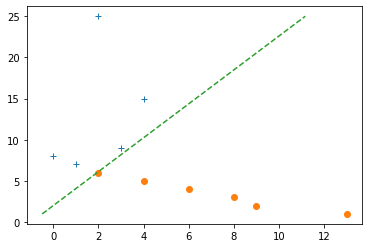

In [17]:
plt.plot(X_positive[2, :], X_positive[1, :], '+')
plt.plot(X_negative[2, :], X_negative[1, :], 'o')
plt.plot(x2, x1, '--')
plt.show()

## Exercise 3

In [18]:
data = pd.read_csv('./data.txt')
data = data.values

In [19]:
data.shape

(99, 3)

In [20]:
X = np.ones((data.shape[1], data.shape[0]))  # create X of size 3x99
X[1:3, :] = data[:, 0:2].T  # fill X's second and third row with features, leave first row with ones

y = data[:, 2:3].T 

In [21]:
#Data normalization
X[1, :] = (X[1, :] - np.std(X[1, :])) / np.mean(X[1, :])
X[2, :] = (X[2, :] - np.std(X[2, :])) / np.mean(X[2, :])

In [22]:
# split dataset into a training set and a test set
X_train = X[:,:70]
y_train = y[:,:70]
X_test = X[:,70:]
y_test = y[:,70:]

In [23]:
theta = np.zeros((X_train.shape[0], 1))

max_iter = 10000
eps = 0.00001
alpha = 0.05
prev_cost = 99

In [24]:
# train model on the training set
for i in range(max_iter):
    h_x = 1 / (1 + np.exp(-theta.T@X_train))

    crossentropy = -y_train*np.log(h_x+0.00001) - (1-y_train)*np.log(1-h_x+0.00001)
    [cost] = np.sum(crossentropy, axis=1) / X_train.shape[1]

    theta_derivs = sum((h_x-y_train) @ X_train.T) / X_train.shape[1]
    theta_derivs.shape = [len(theta_derivs), 1]

    theta = theta - alpha*theta_derivs

    # print every 200 iter:
    if i%200 == 0:
        print("iter ", str(i+1), ", cost ", cost)

    if np.abs(prev_cost - cost) < eps:
        break

    prev_cost = cost

iter  1 , cost  0.6931271807599428
iter  201 , cost  0.6242517111099367
iter  401 , cost  0.5766342030368765
iter  601 , cost  0.5376553296391804
iter  801 , cost  0.5053859237819728
iter  1001 , cost  0.47835357012520774
iter  1201 , cost  0.455446263751762
iter  1401 , cost  0.4358242345779636
iter  1601 , cost  0.4188494070641435
iter  1801 , cost  0.4040323856503468
iter  2001 , cost  0.3909937051713974
iter  2201 , cost  0.3794357864559981
iter  2401 , cost  0.3691226405726415
iter  2601 , cost  0.35986510109476066
iter  2801 , cost  0.35150998848287035
iter  3001 , cost  0.3439320810081563
iter  3201 , cost  0.337028102876307
iter  3401 , cost  0.3307121751596562
iter  3601 , cost  0.3249123379689745
iter  3801 , cost  0.3195678651041229
iter  4001 , cost  0.31462717091480474
iter  4201 , cost  0.3100461640966289
iter  4401 , cost  0.3057869420024087
iter  4601 , cost  0.3018167467523287
iter  4801 , cost  0.2981071243666826
iter  5001 , cost  0.29463324263325785
iter  5201 , cos

In [25]:
print(theta)

[[-7.14748058]
 [ 5.81595248]
 [ 4.98048485]]


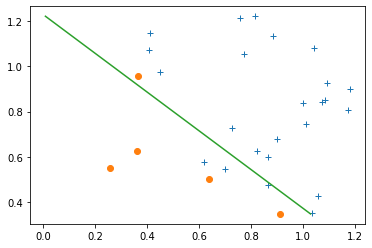

In [26]:
x1 = np.linspace(np.min(X_test[1, :]), np.max(X_test[1, :]), 100)
#decision boundary:
x2 = -theta[0, 0]/theta[2, 0] - theta[1, 0]/theta[2, 0] * x1

X_positive = X_test[:, y_test[0, :] == 1]
X_negative = X_test[:, y_test[0, :] == 0]

plt.plot(X_positive[2, :], X_positive[1, :], '+')
plt.plot(X_negative[2, :], X_negative[1, :], 'o')
plt.plot(x2, x1, '-')
plt.show()